<center><h1>Correlation</h1></center>

In [22]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import pearsonr, spearmanr, kendalltau
from scipy import stats

# ## makes graphs beautiful 
# import matplotlib_inline
# matplotlib_inline.backend_inline.set_matplotlib_formats('svg')




Correlation coefficients quantify the association between variables or features of a dataset.

Correlation is a measure of the association between two variables.

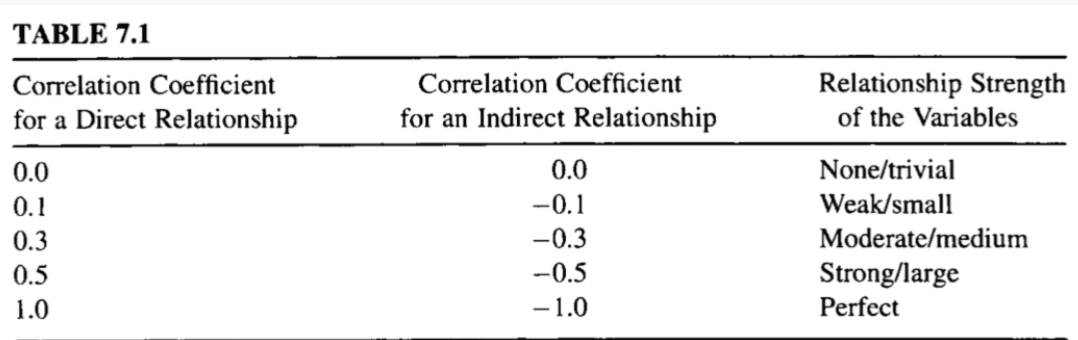

In [2]:
brfss = pd.read_hdf('brfss.hdf', 'brfss')
brfss.shape

(418268, 9)

The BRFSS includes hundreds of variables.  For the examples in this chapter, we'll work with just nine.
The ones we'll start with are `HTM4`, which records each respondent's height in cm, and `WTKG3`, which records weight in kg.

In [3]:
height = brfss['HTM4']
weight = brfss['WTKG3']

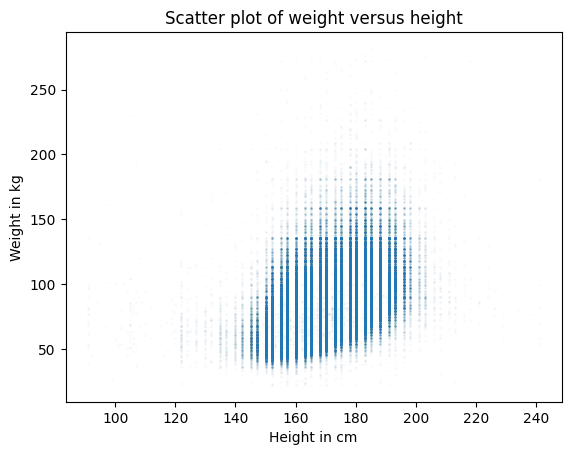

In [4]:
plt.plot(height, weight, 'o', alpha=0.02, markersize=1)

plt.xlabel('Height in cm')
plt.ylabel('Weight in kg')
plt.title('Scatter plot of weight versus height');

We can see that the points fall in discrete columns. That's because most heights were reported in inches and converted to centimeters. We can break up the columns by adding some random noise to the values; in effect, we are filling in the values that got rounded off. Adding random noise like this is called jittering.

We can use NumPy to add noise from a normal distribution with mean 0 and standard deviation 2.

In [5]:
noise = np.random.normal(0, 2, size=len(brfss))
height_jitter = height + noise

Here's what the plot looks like with jittered heights.

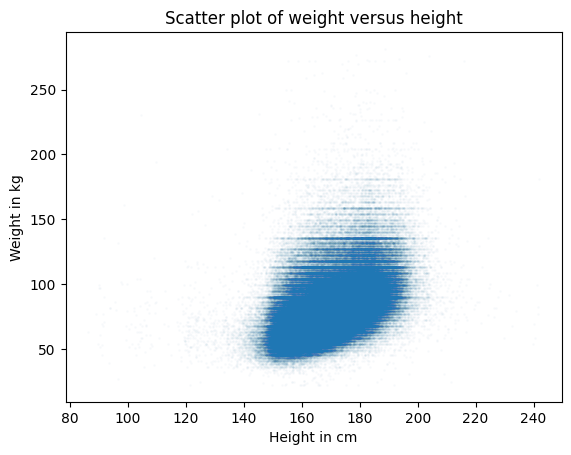

In [6]:
plt.plot(height_jitter, weight, 'o', 
         alpha=0.02, markersize=1)

plt.xlabel('Height in cm')
plt.ylabel('Weight in kg')
plt.title('Scatter plot of weight versus height');

The columns are gone, but now we can see that there are rows where people rounded off their weight.  We can fix that by jittering weight, too.

In [7]:
noise = np.random.normal(0, 2, size=len(brfss))
weight_jitter = weight + noise

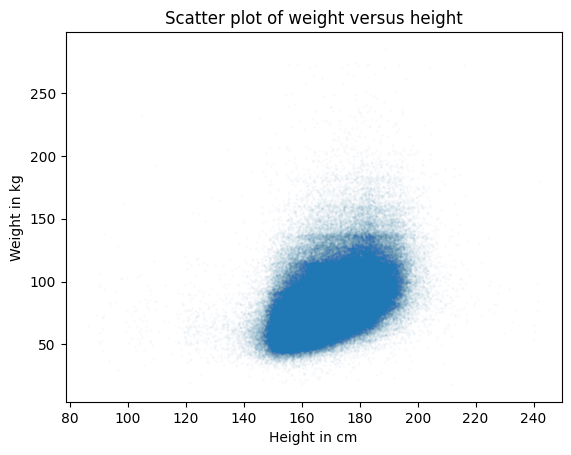

In [8]:
plt.plot(height_jitter, weight_jitter, 'o', 
         alpha=0.02, markersize=1)

plt.xlabel('Height in cm')
plt.ylabel('Weight in kg')
plt.title('Scatter plot of weight versus height');

Finally, let's zoom in on the area where most of the data points are.

The functions xlim and ylim set the lower and upper bounds for the  x  and  y -axis; in this case, we plot heights from 140 to 200 centimeters and weights up to 160 kilograms.

Here's what it looks like.

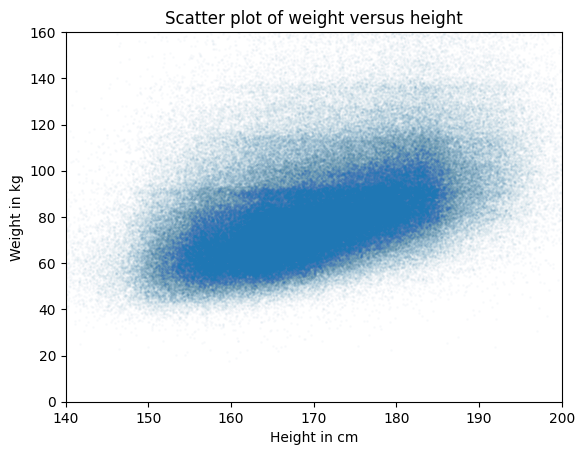

In [9]:
plt.plot(height_jitter, weight_jitter, 'o', 
         alpha=0.02, markersize=1)

plt.xlim([140, 200])
plt.ylim([0, 160])
plt.xlabel('Height in cm')
plt.ylabel('Weight in kg')
plt.title('Scatter plot of weight versus height');

Now we have a reliable picture of the relationship between height and weight.

Below you can see the misleading plot we started with and the more reliable one we ended with. They are clearly different, and they suggest different relationships between these variables.

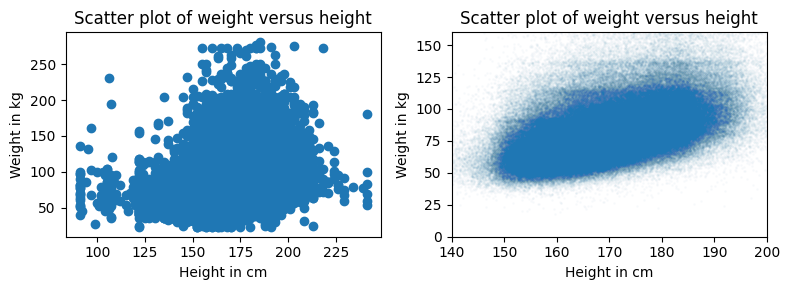

In [10]:
# Set the figure size
plt.figure(figsize=(8, 3))

# Create subplots with 2 rows, 1 column, and start plot 1
plt.subplot(1, 2, 1)
plt.plot(height, weight, 'o')

plt.xlabel('Height in cm')
plt.ylabel('Weight in kg')
plt.title('Scatter plot of weight versus height')

# Adjust the layout so the two plots don't overlap
plt.tight_layout()

# Start plot 2
plt.subplot(1, 2, 2)

plt.plot(height_jitter, weight_jitter, 'o', 
         alpha=0.02, markersize=1)

plt.xlim([140, 200])
plt.ylim([0, 160])
plt.xlabel('Height in cm')
plt.ylabel('Weight in kg')
plt.title('Scatter plot of weight versus height')
plt.tight_layout()

## Spearmans correlation

In [68]:
def cal_rank(data):
    l = len(data)
    rank = [None for _ in range(l)]
    for i in range(len(data)):
        less_than_i = np.sum(data<data[i])
        greater_than_i = np.sum(data>data[i])
        rank[i] = (less_than_i + l - greater_than_i )/2
    return np.array(rank)

def correlation(x, y):
    cov = np.sum((x-x.mean())*((y-y.mean())))/len(x)
    sigma_x = x.std()
    sigma_y = y.std()
    return cov/(sigma_x*sigma_y)


In [69]:
x = np.random.randint(10, size=10)
y = np.random.randint(10, size=10)
x, y, np.sum((x-x.mean())*((y-y.mean())))/len(x)/(x.std()*y.std())

(array([0, 7, 2, 6, 0, 0, 3, 5, 6, 1]),
 array([7, 7, 5, 4, 1, 7, 6, 5, 2, 5]),
 -0.07665423797664193)

In [70]:
ranka = cal_rank(x)
rankb = cal_rank(y)

print(correlation(ranka, rankb))
pearsonr(ranka, rankb), spearmanr(x, y)


-0.12618861628126718


(PearsonRResult(statistic=-0.1261886162812672, pvalue=0.7283160690040307),
 SignificanceResult(statistic=-0.1261886162812672, pvalue=0.728316069004031))